In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from funcions import dades, graficar
#!pip install pmdarima --quiet
import pmdarima as pm

In [5]:
df = dades()
df = df.sort_values(by='FECHAPEDIDO')
df.set_index('FECHAPEDIDO')
categoria = 2
origen = '0-14'
df = graficar(df, categoria, origen)
df['MES_ABSOLUT'] = np.arange(len(df))
df.set_index('MES_ABSOLUT', inplace=True)
df

,CAJA
MES_ABSOLUT,
0,1503.0
1,1341.0
2,1866.0
3,2273.0
4,1620.0
...,...
103,4836.0
104,4350.0
105,4622.0


In [6]:
SARIMA_model = pm.auto_arima(df['CAJA'],
                           start_p=1, d=None, start_q=1,
                           max_p=5, max_d=2, max_q=5,
                           seasonal=True,
                           m=12,
                           start_P=0, D=1, start_Q=0,
                           max_P=2, max_D=1, max_Q=2,
                           max_order=None,
                           suppress_warnings=True, 
                           stepwise=True)

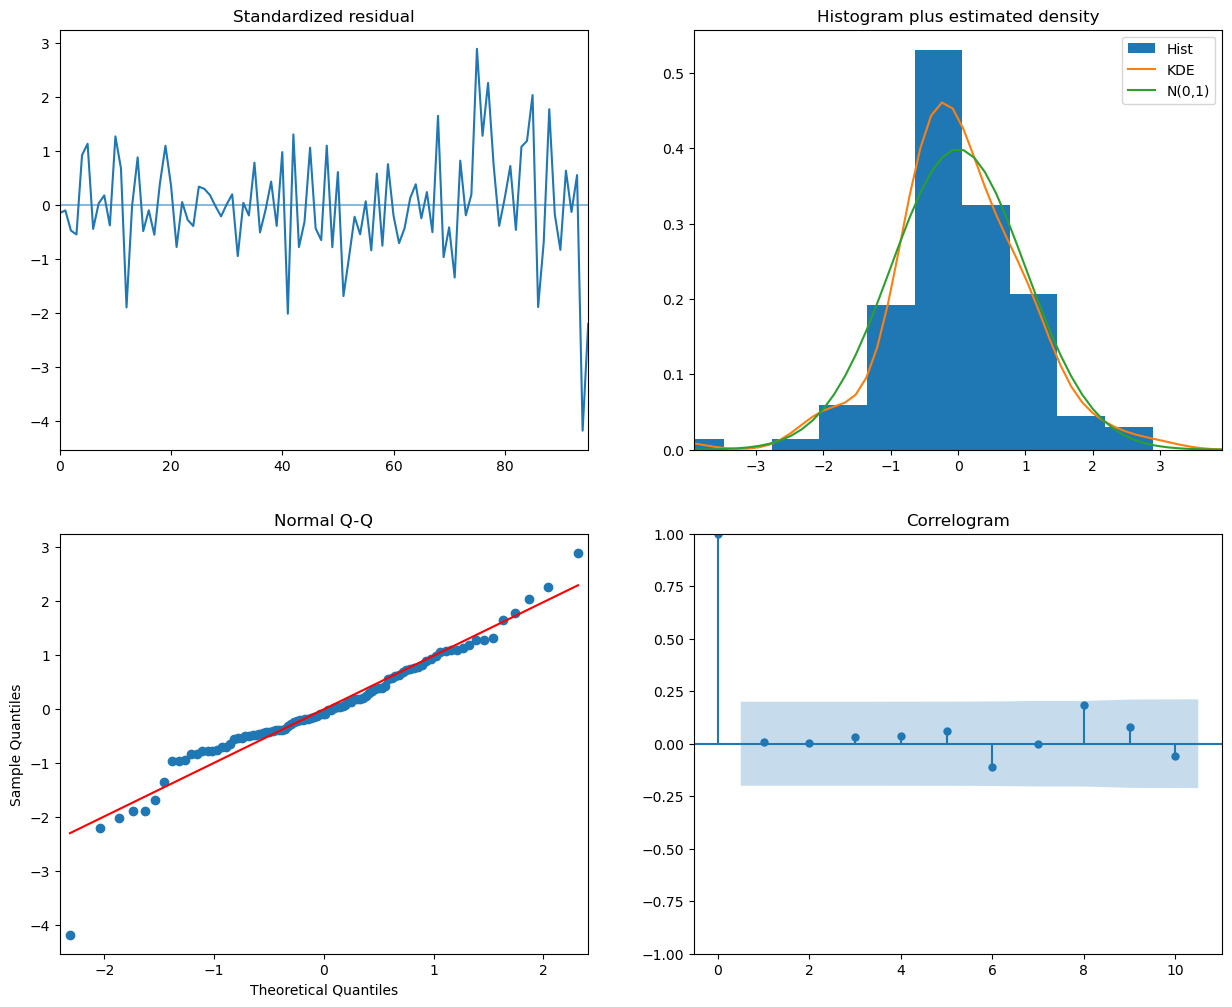

In [7]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

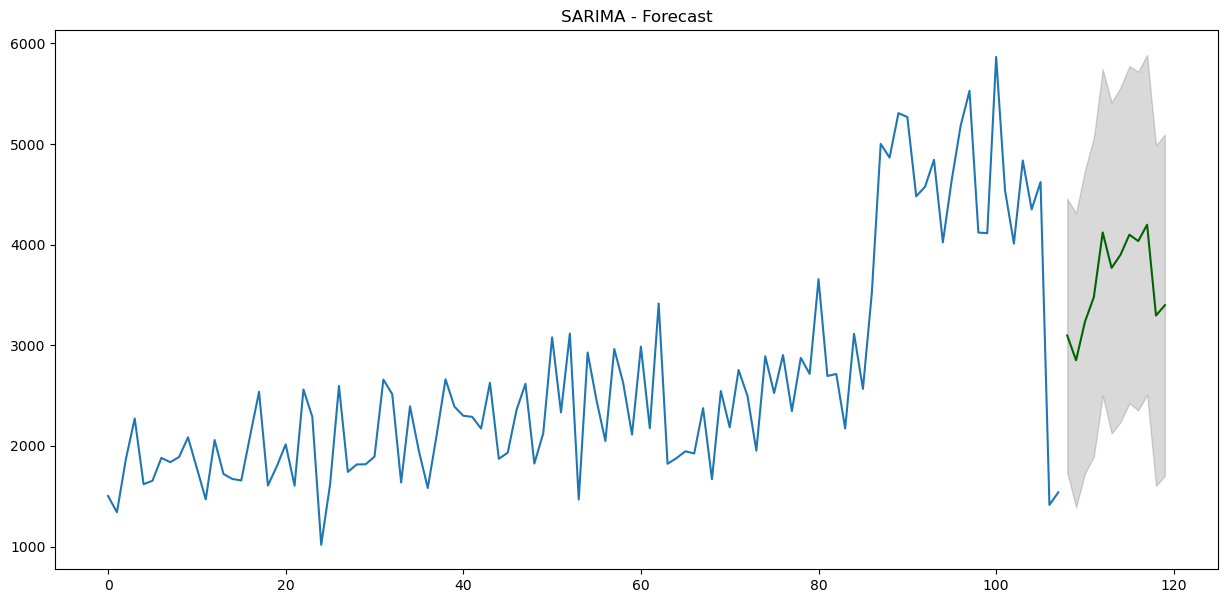

In [8]:
def forecast(SARIMA_model, periods=12):
    # Forecast
    n_periods = periods
    fitted, confint = SARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = np.arange(n_periods) + df.index[-1] + 1

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df["CAJA"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)

    plt.title("SARIMA - Forecast")
    plt.show()

forecast(SARIMA_model)